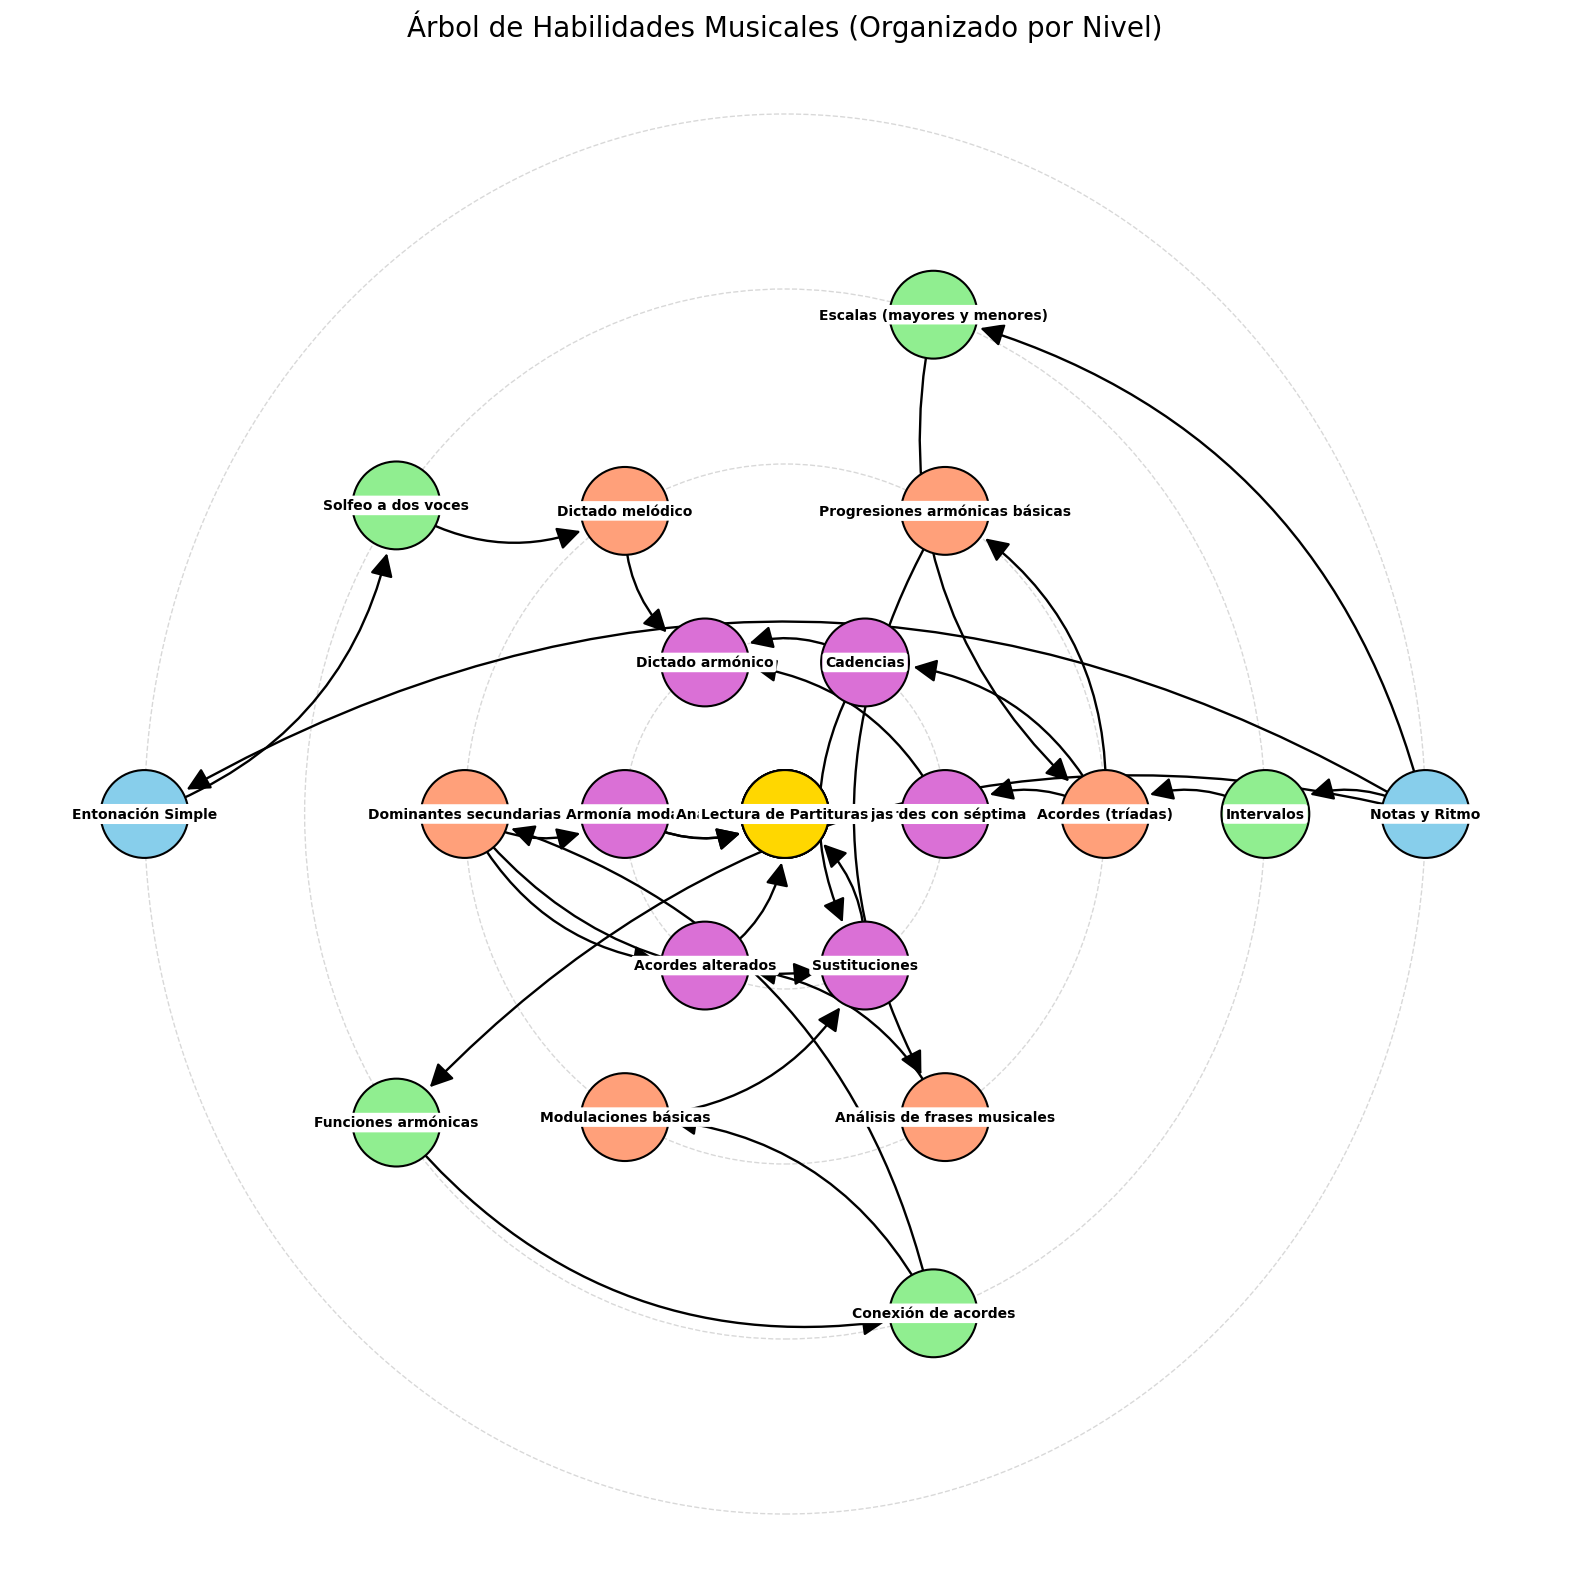

In [28]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import math
import os

# 1. Definir la ruta al archivo de datos
# Asegúrate de que este archivo exista en la ruta especificada.
file_path = "../data/graph/nodes.json"

# 2. Cargar la estructura de nodos desde el archivo JSON
try:
    with open(file_path, "r", encoding="utf-8") as f:
        graph_data = json.load(f)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en {file_path}. Asegúrate de que la ruta es correcta.")
    graph_data = None

if graph_data:
    # 3. Crear grafo dirigido
    G = nx.DiGraph()

    # 4. Agregar nodos con atributos
    for node in graph_data["nodes"]:
        G.add_node(
            node["id"],
            name=node["name"],
            level=node["level"],
            type=node["type"],
            description=node["description"]
        )

    # 5. Agregar aristas
    G.add_edges_from((edge["source"], edge["target"]) for edge in graph_data["edges"])

    # 6. Crear el layout radial por niveles
    levels = {}
    for node, data in G.nodes(data=True):
        lvl = data["level"]
        if lvl not in levels:
            levels[lvl] = []
        levels[lvl].append(node)
    
    pos = {}
    spacing = 3.5  # Espaciado aumentado entre los círculos
    max_level = max(levels.keys())

    for lvl, nodes_in_current_level in levels.items():
        if lvl == max_level:
            # El nivel más alto (5) va al centro
            for node in nodes_in_current_level:
                pos[node] = (0, 0)
        else:
            radius = spacing * (max_level - lvl)
            n_nodes = len(nodes_in_current_level)
            # Ajustar el ángulo inicial para una mejor distribución visual
            # Puedes experimentar con este valor, por ejemplo, math.pi / n_nodes
            angle_start_offset = 0 
            for i, node in enumerate(nodes_in_current_level):
                # Distribuir los nodos uniformemente en el círculo
                angle = angle_start_offset + 2 * math.pi * i / n_nodes
                x = radius * math.cos(angle)
                y = radius * math.sin(angle)
                pos[node] = (x, y)

    # 7. Colores por nivel
    color_map = {
        1: "#87CEEB",  # skyblue
        2: "#90EE90",  # lightgreen
        3: "#FFA07A",  # salmon
        4: "#DA70D6",  # orchid
        5: "#FFD700"   # gold
    }
    node_colors = [color_map[G.nodes[node]["level"]] for node in G.nodes()]

    plt.figure(figsize=(20, 20)) # Tamaño de figura aumentado aún más
    
    # --- Añadir los círculos concéntricos ---
    ax = plt.gca()
    for lvl in sorted(levels.keys()):
        if lvl == max_level:
            continue
        radius = spacing * (max_level - lvl)
        circle = plt.Circle((0, 0), radius, color='gray', linestyle='--', alpha=0.3, fill=False)
        ax.add_patch(circle)
    # --- Fin de la adición ---

    # 8. Dibujar nodos
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=4000, # Tamaño de nodo aumentado
        edgecolors="black",
        linewidths=1.5
    )

    # 9. Dibujar etiquetas
    labels = {node: G.nodes[node]["name"] for node in G.nodes()}
    nx.draw_networkx_labels(
        G, pos,
        labels=labels,
        font_size=10, # Tamaño de fuente aumentado
        font_weight="bold",
        bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.2")
    )

    # 10. Dibujar aristas curvas con margen en el destino
    # Aumentamos ligeramente el radio de la curvatura (rad)
    # y el min_target_margin para que la flecha termine más lejos del centro del nodo.
    for edge in G.edges():
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=[edge],
            edge_color="black",
            arrows=True,
            arrowsize=35, # Tamaño de flecha aumentado
            width=1.7,
            connectionstyle="arc3,rad=0.3", # Aumentado el radio de curvatura
            min_target_margin=35 # Margen de la flecha aumentado
        )

    # 11. Mostrar gráfico
    plt.title("Árbol de Habilidades Musicales (Organizado por Nivel)", size=20) # Título más grande
    plt.axis("off")
    plt.show()